### Test estimates of Mr and FeH by comparing them to another set, either true or a different method

In [1]:
%matplotlib inline
import sys
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from scipy import optimize
from scipy.stats import gaussian_kde
# from scipy import interpolate 
from scipy.interpolate import griddata
from astropy.table import join
from astroML.stats import binned_statistic_2d

In [2]:
## automatically reload any modules read below that might have changed (e.g. plots)
%reload_ext autoreload
%autoreload 2
# importing plotting and locus tools: 
sys.path.append('../src')
import LocusTools as lt
import BayesTools as bt
import PlotTools as pt

## Bayes performance

READING FROM ../data/simCatalog_three_pix_triout_chiTest4.txt
814450 read from ../data/simCatalog_three_pix_triout_chiTest4.txt
from 814450  selected with u < 40 814450
814450 read from ../data/simCatalog_three_pix_triout_chiTest4_BayesEstimates3Dsparse10_2.txt
after chi2min< 10 selection: 814450 803371
calling qpB Mr
plots for dMr
made plot: ../plots/qpB_Mr.png


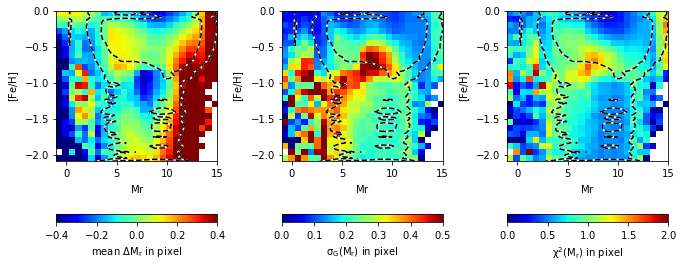

calling qpB FeH
plots for dFeH
made plot: ../plots/qpB_FeH.png


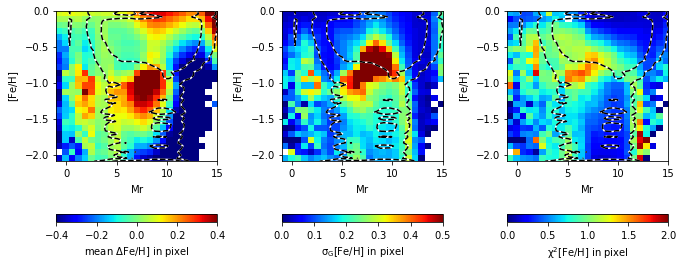

calling qpB Ar
plots for dAr
made plot: ../plots/qpB_Ar.png


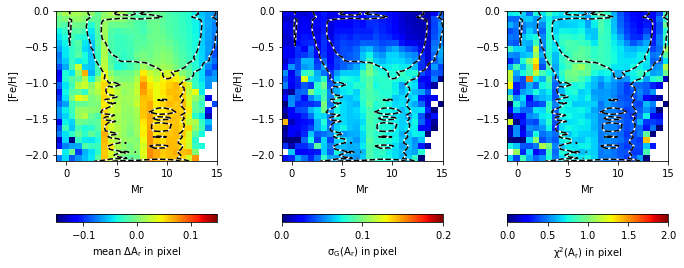

READING FROM ../data/simCatalog_three_pix_triout_chiTest4.txt
814450 read from ../data/simCatalog_three_pix_triout_chiTest4.txt
from 814450  selected with u < 40 814450
814450 read from ../data/simCatalog_three_pix_triout_chiTest4_BayesEstimates3Dsparse10_2.txt
after chi2min< 10 selection: 814450 803371
calling qpB Mr
plots for dMr
made plot: ../plots/qpB_Mr.png


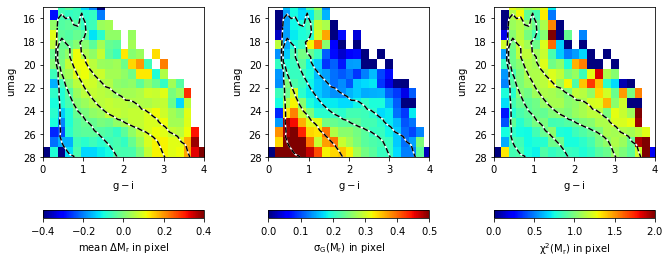

calling qpB FeH
plots for dFeH
made plot: ../plots/qpB_FeH.png


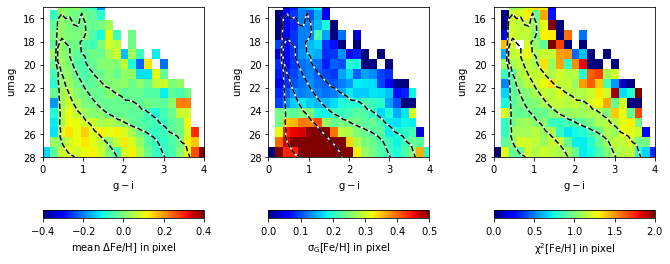

calling qpB Ar
plots for dAr
made plot: ../plots/qpB_Ar.png


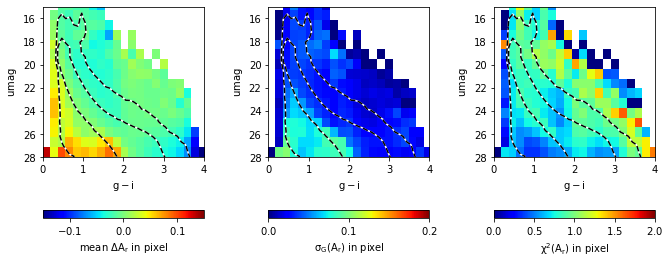

READING FROM ../data/simCatalog_three_pix_triout_chiTest4.txt
814450 read from ../data/simCatalog_three_pix_triout_chiTest4.txt
from 814450  selected with u < 40 814450
814450 read from ../data/simCatalog_three_pix_triout_chiTest4_BayesEstimates3Dsparse10_2.txt
after chi2min< 10 selection: 814450 803371
calling qpBcmd
made plot: ../plots/qpBcmd.png


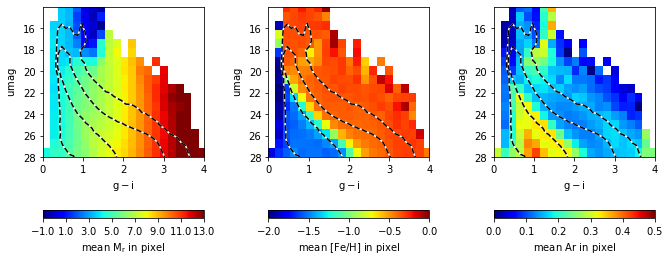

In [3]:
infile1 = '../data/simCatalog_three_pix_triout_chiTest4.txt'
infile2 = '../data/simCatalog_three_pix_triout_chiTest4_BayesEstimates3D.txt'

# 10-2 downgraded grid
infile2 = '../data/simCatalog_three_pix_triout_chiTest4_BayesEstimates3Dsparse10_2.txt'


chi2max=10
umagMax=40

# performance (mean, sig, chi2) in FeH vs. Mr diagrams
s1, s2 = bt.checkBayes(infile1, infile2, chi2max, umagMax, chiTest=True, cmd=False, fitQ=False, b3D=True)
!cp '../plots/qpB_Mr.png' '../plots/qpB_chiTest4_3D_Mr.png' 
!cp '../plots/qpB_FeH.png' '../plots/qpB_chiTest4_3D_FeH.png' 
!cp '../plots/qpB_Ar.png' '../plots/qpB_chiTest4_3D_Ar.png' 

# performance (mean, sig, chi2) in umag vs. g-i diagrams
s1, s2 = bt.checkBayes(infile1, infile2, chi2max, umagMax, chiTest=True, cmd=True, fitQ=False, b3D=True)
!cp '../plots/qpB_Mr.png' '../plots/qpBcmd_chiTest4_3D_Mr.png' 
!cp '../plots/qpB_FeH.png' '../plots/qpBcmd_chiTest4_3D_FeH.png' 
!cp '../plots/qpB_Ar.png' '../plots/qpBcmd_chiTest4_3D_Ar.png' 

# mean values of Mr, FeH and Ar in umag vs. g-i diagrams
s1, s2 = bt.checkBayes(infile1, infile2, chi2max, umagMax, chiTest=True, cmd=True, fitQ=True, b3D=True)
!cp '../plots/qpBcmd.png' '../plots/qpBmeans_chiTest4_3D.png'  

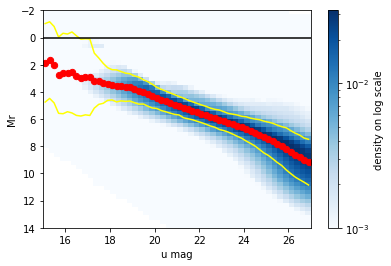

In [4]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['Mr'], 15.0, 27.0, 48, 14.0, -2.0, 52, 'u mag', 'Mr', logScale=True)

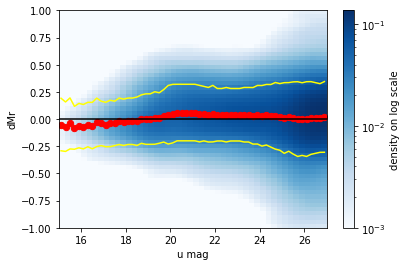

In [5]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['dMr'], 15.0, 27.0, 48, -1.0, 1.0, 52, 'u mag', 'dMr', logScale=True)

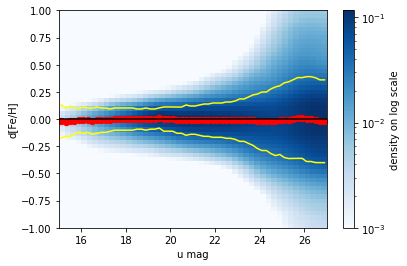

In [39]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['dFeH'], 15.0, 27.0, 48, -1.0, 1.0, 52, 'u mag', 'd[Fe/H]', logScale=True)

In [6]:
umagMax = 25.7      # 5-sigma LSST coadded depth
lt.makeStatsTable3D(s2, dMrname='dMr', dFeHname='dFeH', magName='umag', magThresh=umagMax, FeHthresh=-1.0, Mr1=4.0, Mr2=8.0)


---------------------------------------------------------------------------------------------------
      FULL SAMPLE:           dMr                      dFeH                         Ar
             all: ['0.030', '0.25', 803371] ['0.010', '0.24', 803371] ['-0.010', '0.05', 803371]
    mag selected: ['0.030', '0.21', 226690] ['0.010', '0.14', 226690] ['-0.010', '0.04', 226690]
---------------------------------------------------------------------------------------------------
       low [FeH]:           dMr                  dFeH
             all: ['0.040', '0.28', 36817] ['0.010', '0.20', 36817] ['0.000', '0.06', 36817]
          giants: ['-0.130', '0.35', 3462] ['0.000', '0.13', 3462] ['0.026', '0.07', 3462]
         blue MS: ['0.050', '0.27', 32371] ['0.020', '0.21', 32371] ['-0.001', '0.06', 32371]
          red MS: ['0.550', '0.37', 984] ['-0.750', '0.55', 984] ['-0.014', '0.05', 984]
      high [FeH]:           dMr                  dFeH
             all: ['0.020', '0.21', 189873] [

In [51]:
umagMax = 25.7      # 5-sigma LSST coadded depth
lt.makeStatsTable3D(s2, dMrname='dMr', dFeHname='dFeH', magName='umag', magThresh=umagMax, FeHthresh=-1.0, Mr1=4.0, Mr2=8.0)

---------------------------------------------------------------------------------------------------
      FULL SAMPLE:           dMr                      dFeH                         Ar
             all: ['0.060', '0.26', 804427] ['-0.020', '0.24', 804427] ['-0.011', '0.05', 804427]
    mag selected: ['0.050', '0.21', 227414] ['-0.010', '0.14', 227414] ['-0.012', '0.04', 227414]
---------------------------------------------------------------------------------------------------
       low [FeH]:           dMr                  dFeH
             all: ['0.040', '0.28', 36845] ['0.010', '0.21', 36845] ['0.000', '0.06', 36845]
          giants: ['-0.130', '0.35', 3463] ['0.000', '0.13', 3463] ['0.026', '0.07', 3463]
         blue MS: ['0.050', '0.27', 32396] ['0.020', '0.21', 32396] ['-0.001', '0.06', 32396]
          red MS: ['0.570', '0.40', 986] ['-0.780', '0.56', 986] ['-0.014', '0.05', 986]
      high [FeH]:           dMr                  dFeH
             all: ['0.050', '0.20', 190569]

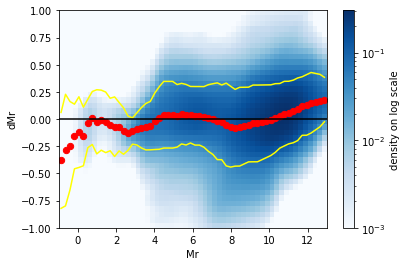

In [7]:
(xBin, medianBin) = pt.plot2Dmap(s2['Mr'], s2['dMr'], -1.0, 13.0, 56, -1.0, 1.0, 40, 'Mr', 'dMr', logScale=True)

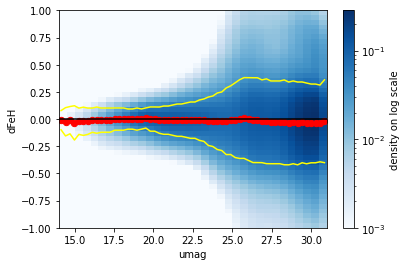

In [42]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['dFeH'], 14.0, 31.0, 34, -1.0, 1.0, 45, 'umag', 'dFeH', logScale=True)

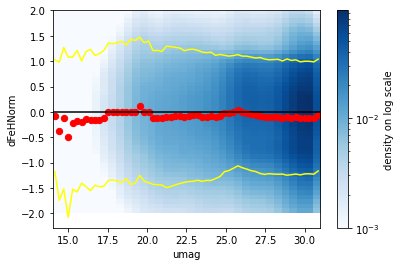

In [43]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['dFeHNorm'], 14.0, 31.0, 34, -2.0, 2.0, 45, 'umag', 'dFeHNorm', logScale=True)

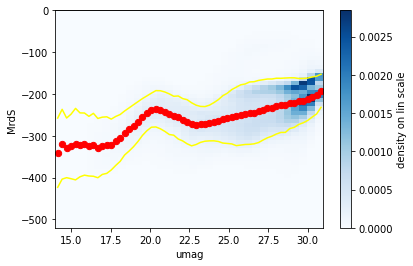

In [44]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['MrdS'], 14.0, 31.0, 34, -520.0, 0.0, 52, 'umag', 'MrdS', logScale=False)

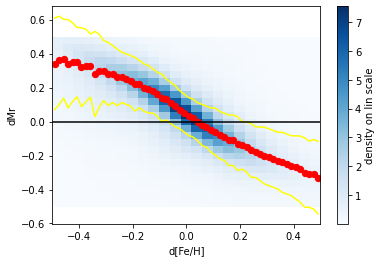

In [45]:
(xBin, medianBin) = pt.plot2Dmap(s2['dFeH'], s2['dMr'], -0.5, 0.5, 25, -0.5, 0.5, 25, 'd[Fe/H]', 'dMr', logScale=False)

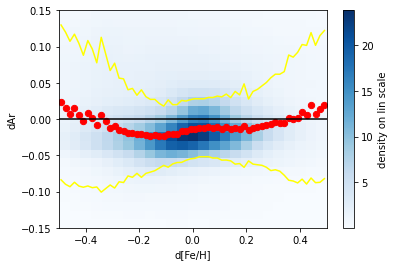

In [52]:
(xBin, medianBin) = pt.plot2Dmap(s2['dFeH'], s2['dAr'], -0.5, 0.5, 25, -0.15, 0.15, 25, 'd[Fe/H]', 'dAr', logScale=False)

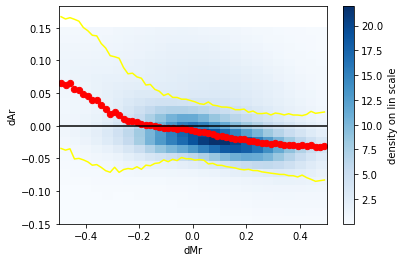

In [53]:
(xBin, medianBin) = pt.plot2Dmap(s2['dMr'], s2['dAr'], -0.5, 0.5, 25, -0.15, 0.15, 25, 'dMr', 'dAr', logScale=False)

## Karlo's NN performance

READING FROM ../data/simCatalog_three_pix_triout_chiTest4.txt
814450 read from ../data/simCatalog_three_pix_triout_chiTest4.txt
READING FROM ../data/KarloNN/simCatalog_three_pix_triout_chiTest4_NaiveMulti.txt
814450 read from ../data/KarloNN/simCatalog_three_pix_triout_chiTest4_NaiveMulti.txt
from: 814450 selected in testset: 122127
calling qpB Mr
plots for dMr
made plot: ../plots/qpB_Mr.png


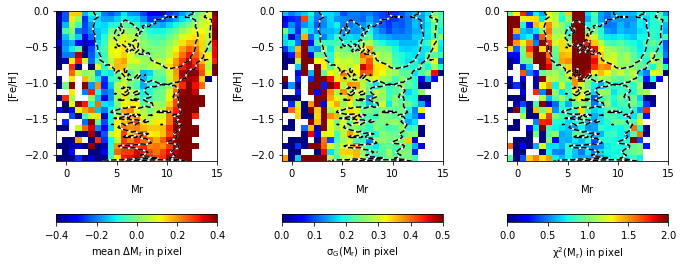

calling qpB FeH
plots for dFeH
made plot: ../plots/qpB_FeH.png


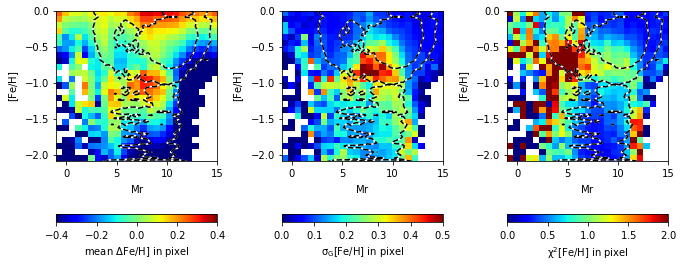

calling qpB Ar
plots for dAr
made plot: ../plots/qpB_Ar.png


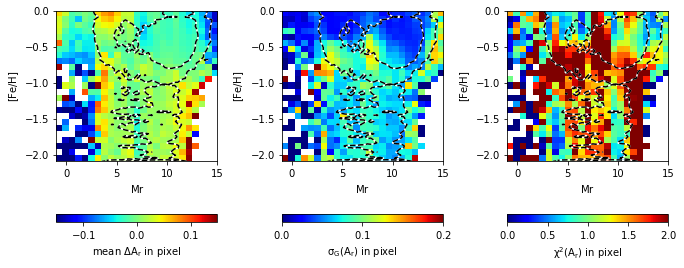

In [5]:
## final test for Karlo's NN, with uErr generated from "observed" mags 
f1 = '../data/simCatalog_three_pix_triout_chiTest4.txt'
f2 = '../data/KarloNN/simCatalog_three_pix_triout_chiTest4_NaiveMulti.txt'
simsF, simsTestF = bt.cK(f1,f2) 

READING FROM ../data/simCatalog_three_pix_triout_chiTest4.txt
814450 read from ../data/simCatalog_three_pix_triout_chiTest4.txt
READING FROM ../data/KarloNN/simCatalog_three_pix_triout_chiTest4_NaiveSingle.txt
814450 read from ../data/KarloNN/simCatalog_three_pix_triout_chiTest4_NaiveSingle.txt
from: 814450 selected in testset: 122127
calling qpB Mr
plots for dMr
made plot: ../plots/qpB_Mr.png


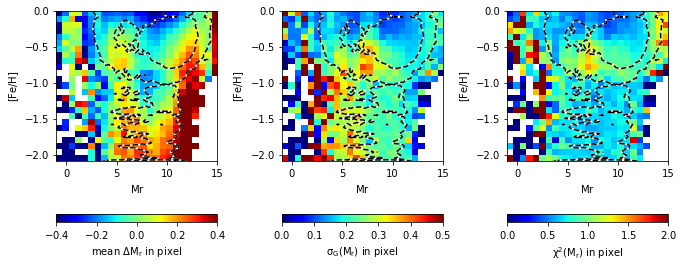

calling qpB FeH
plots for dFeH
made plot: ../plots/qpB_FeH.png


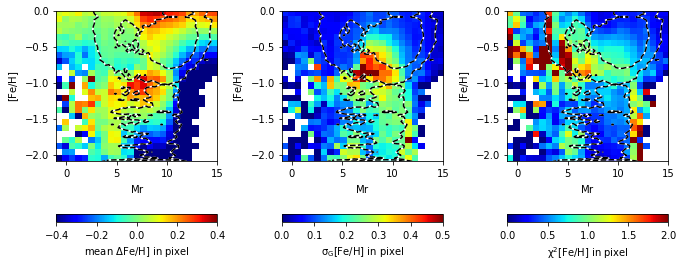

calling qpB Ar
plots for dAr
made plot: ../plots/qpB_Ar.png


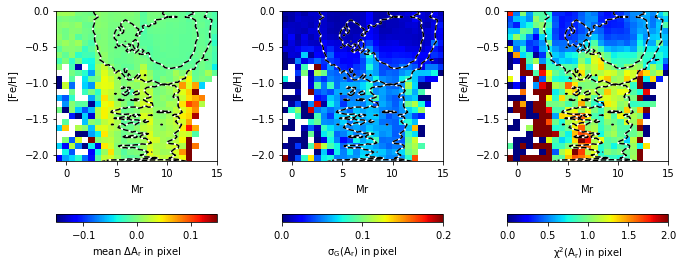

In [6]:
## final test for Karlo's NN, with uErr generated from "observed" mags 
f1 = '../data/simCatalog_three_pix_triout_chiTest4.txt'
f2 = '../data/KarloNN/simCatalog_three_pix_triout_chiTest4_NaiveSingle.txt'
simsF, simsTestF = bt.cK(f1,f2) 

READING FROM ../data/simCatalog_three_pix_triout_v1.txt
814460 read from ../data/simCatalog_three_pix_triout_v1.txt
READING FROM ../data/KarloNN/simCatalog_three_pix_triout_v1_NaiveSingle.txt
814460 read from ../data/KarloNN/simCatalog_three_pix_triout_v1_NaiveSingle.txt
814460
calling qpB Mr
plots for dMr
made plot: ../plots/qpB_Mr.png


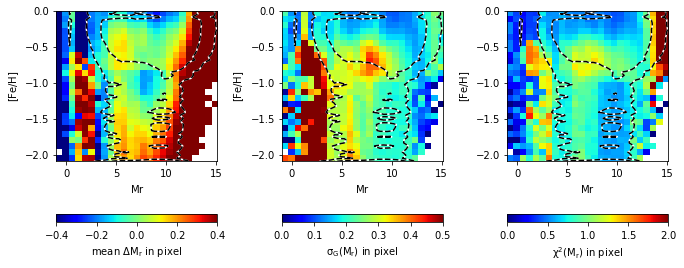

calling qpB FeH
plots for dFeH
made plot: ../plots/qpB_FeH.png


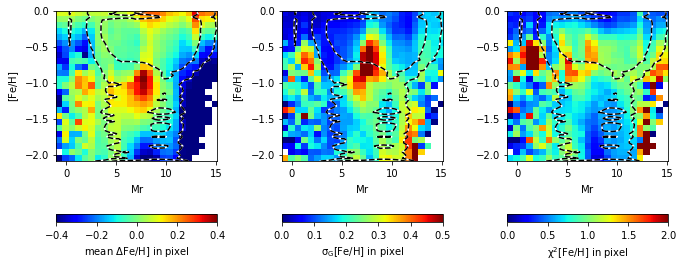

calling qpB Ar
plots for dAr
made plot: ../plots/qpB_Ar.png


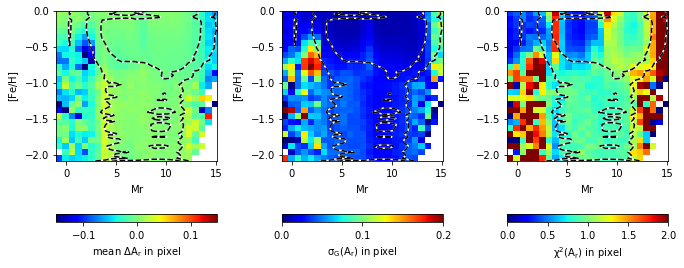

In [81]:
f1 = '../data/simCatalog_three_pix_triout_v1.txt'
f2 = '../data/KarloNN/simCatalog_three_pix_triout_v1_NaiveSingle.txt'
simsF, simsTestF = bt.cK(f1,f2, sim3=False, simtype='a', chiTest=False) 